##Project 2: In-Depth Exploratory Data Analysis (EDA)

#Netflix Content Analysis 🎬

Project Objective: To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

Core Concepts We'll Cover:

Data Cleaning & Transformation: Handling missing values and converting data types (especially dates).
Time-Series Analysis: Analyzing how content has been added to Netflix over the years.
Text Data Manipulation: Parsing and analyzing columns with multiple values, like listed_in (genres) and cast.
Geographical & Rating Analysis: Understanding where content comes from and its maturity level.
Feature Engineering: Creating new, insightful features like 'content age'.
Advanced Visualization: Creating insightful plots to understand distributions and relationships in the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
sns.set_style('darkgrid')

In [ ]:
df=pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
## 1. Handle Missing values of 'director' and 'cast'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',dayfirst=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [ ]:
## Create new features for year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


## What is the distribution of content type?

In [ ]:
df['type'].value_counts()
# print(a.index)

,count
type,
Movie,5372
TV Show,2398


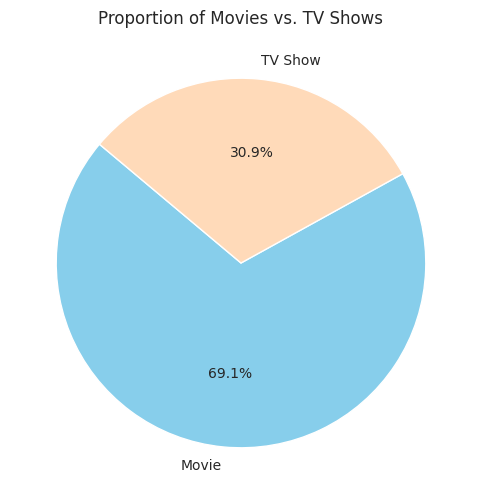

In [ ]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts,labels=type_counts.index,autopct="%1.1f%%",startangle=140,colors=['#87CEEB', '#FFDAB9'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

# How has content been added over time?

<Figure size 1000x800 with 0 Axes>

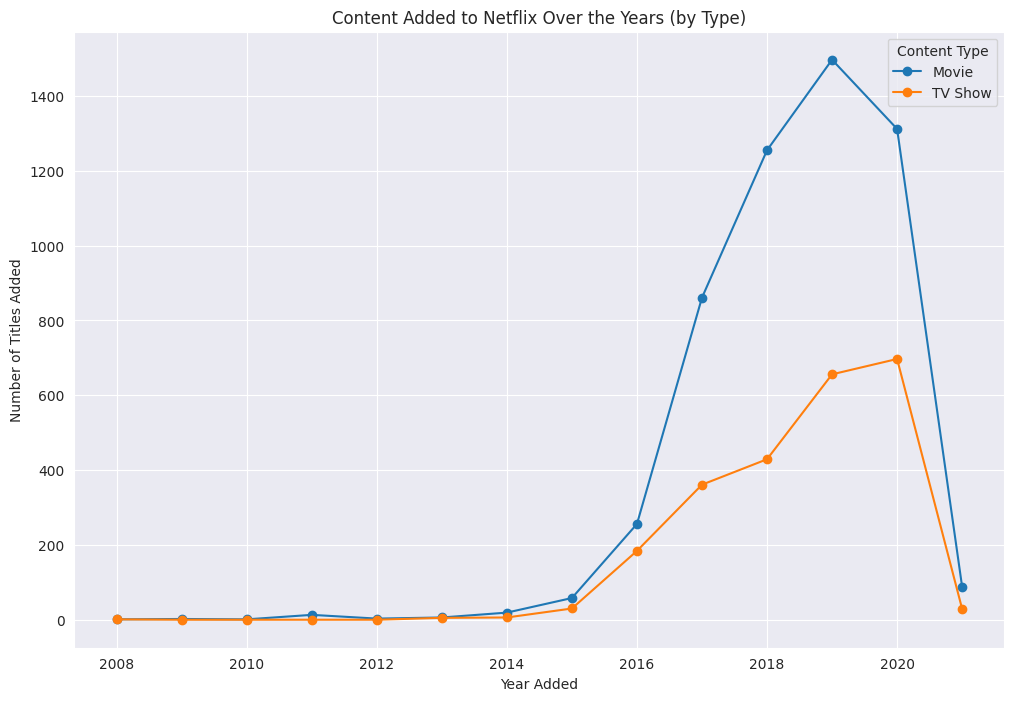

In [ ]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(10,8))
content_over_time.plot(kind='line',marker='o',figsize=(12,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

# What are the most popular genres?

In [ ]:
df['listed_in']

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


In [ ]:
genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

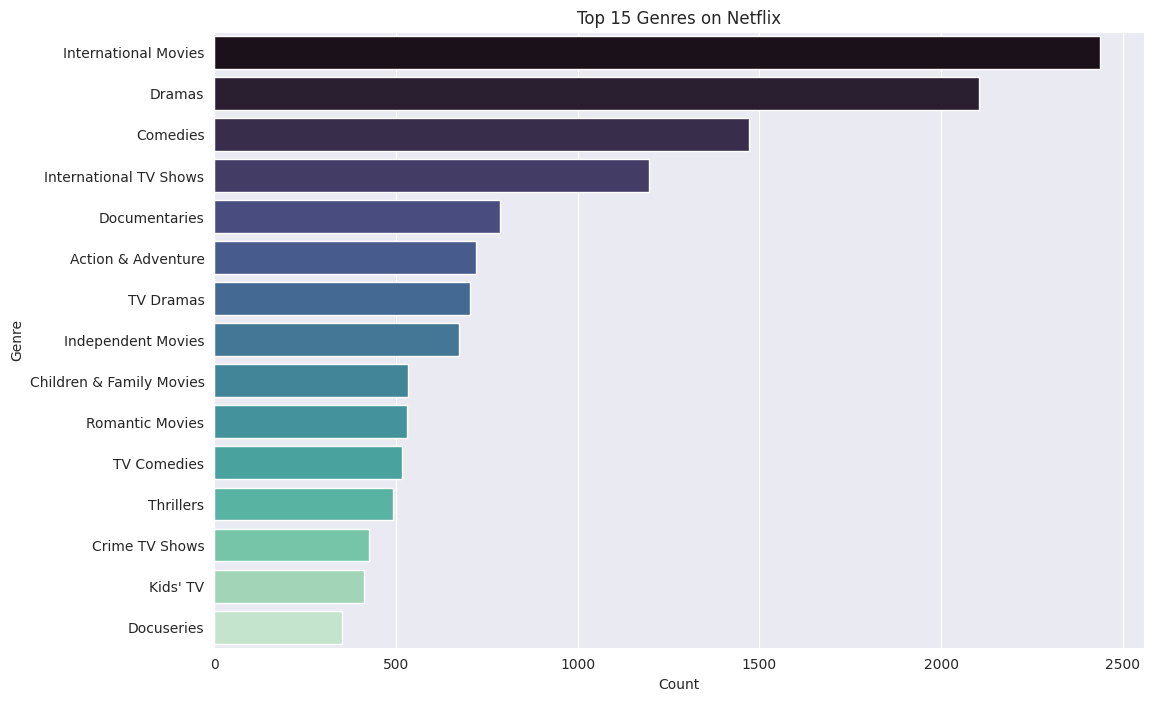

In [ ]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Insight: "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

# What is the distribution of content duration?

In [ ]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [ ]:
movies_df['duration_min'] = movies_df['duration'].str.replace(" min","").astype(int)

In [ ]:
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(" Seasons","").str.replace(" Season","").astype(int)

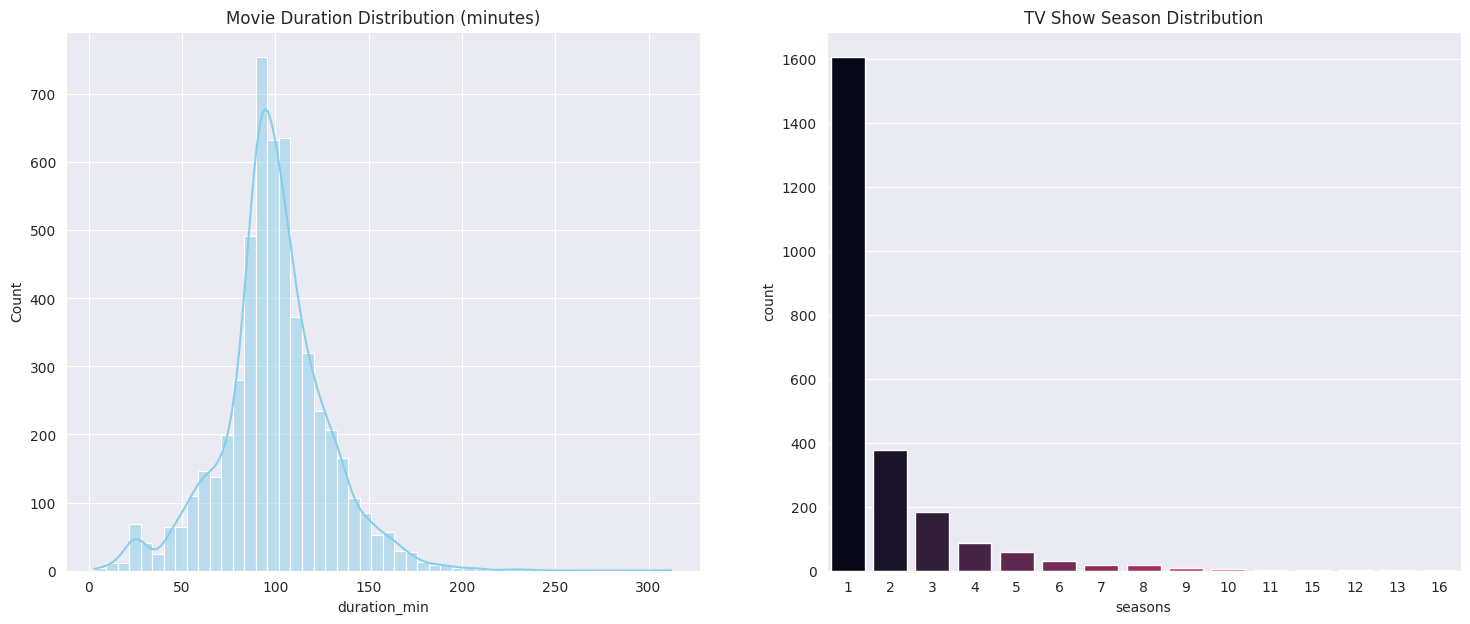

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

Insight:

The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

# Where does the content come from? (Geographical Analysis)

In [ ]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [ ]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

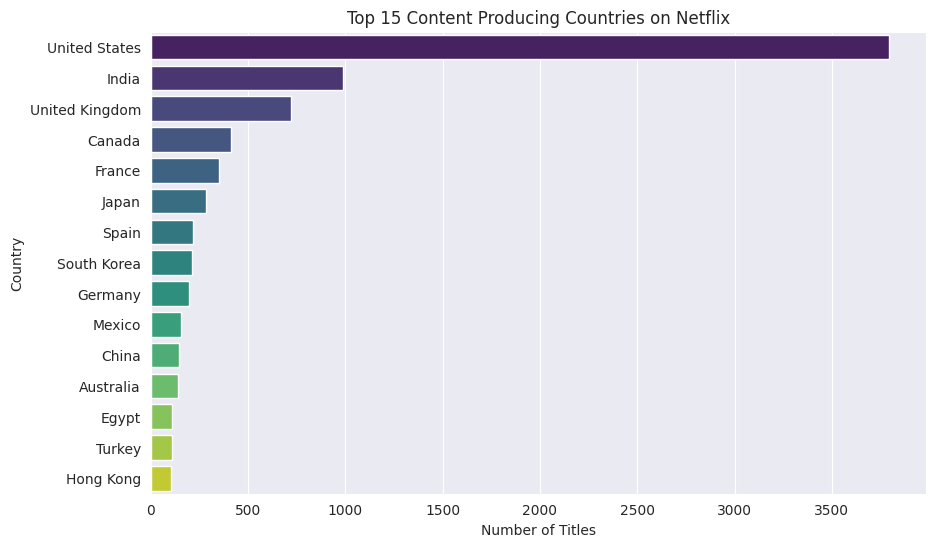

In [ ]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

Insight: The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

 # What are the maturity ratings of the content?

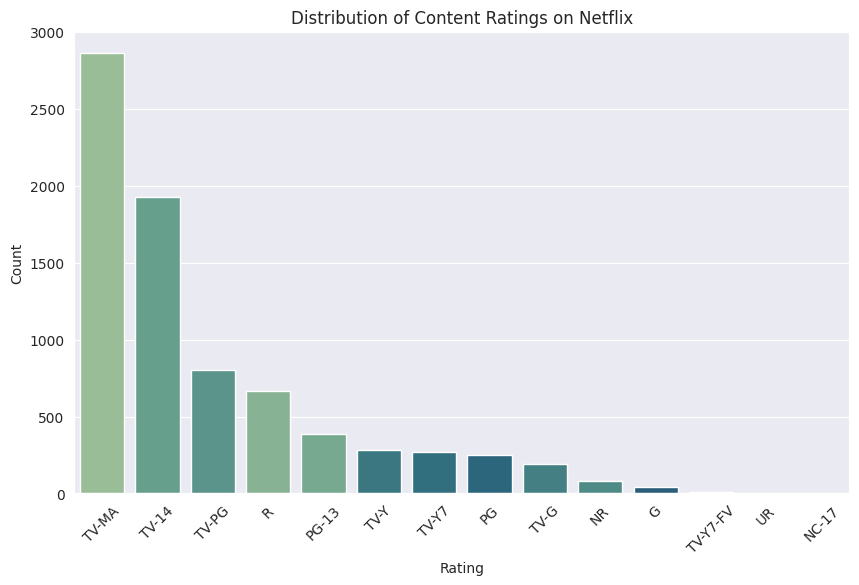

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insight: A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

# Feature Engineering - Content Freshness

Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

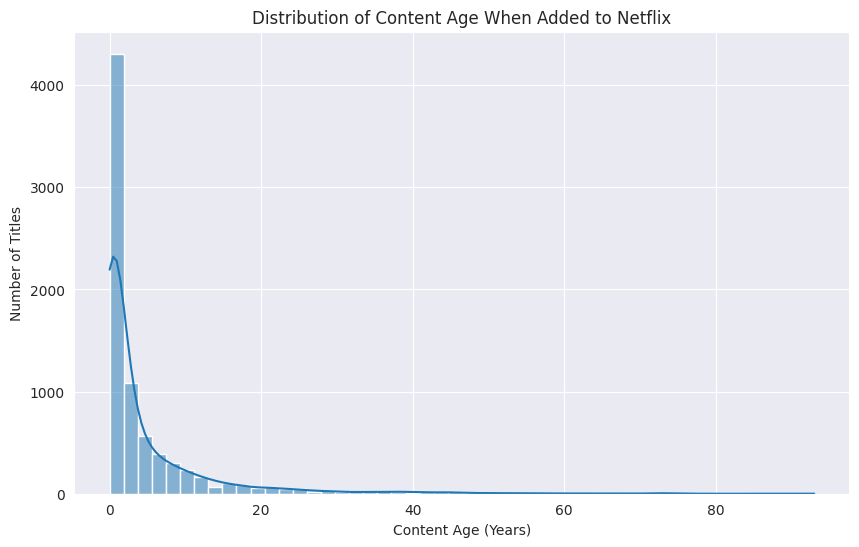

In [ ]:
## Create 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(10, 6))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

Insight: The large spike at 0 indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

# Deeper Multivariate Analysis

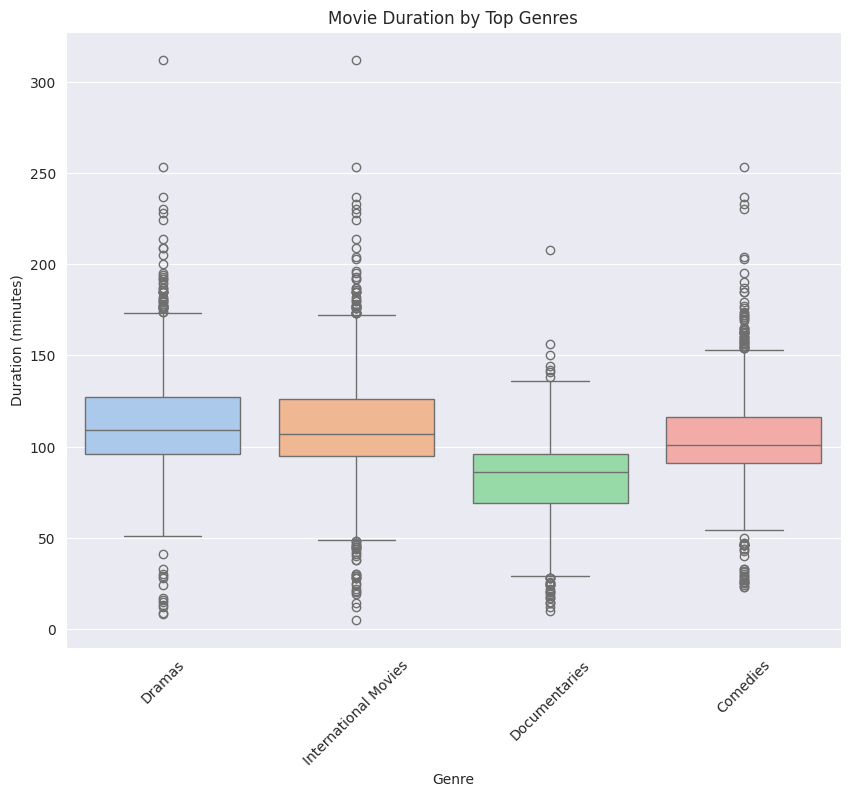

In [ ]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

Insight: While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

# Word Cloud from Content Descriptions

As a final visual analysis, let's generate a word cloud from the description column to see what themes and words are most common in Netflix content.

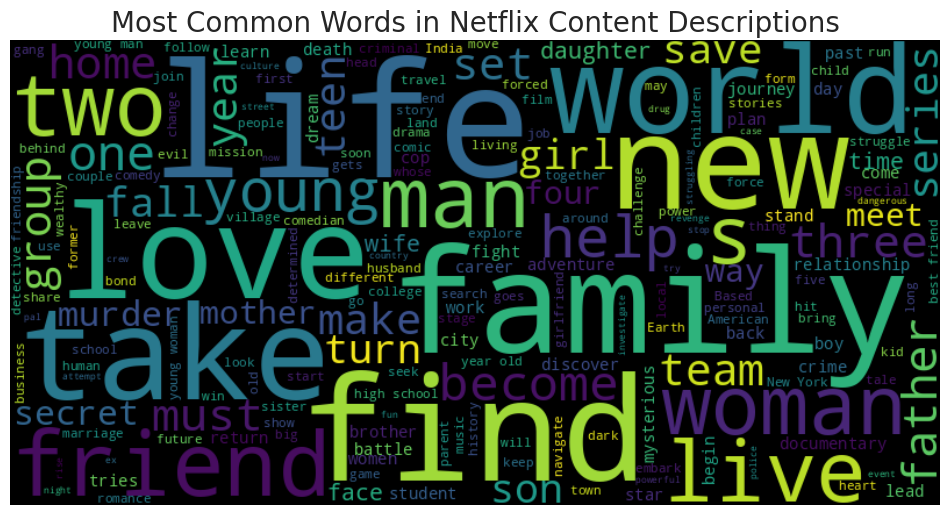

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Insight: The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

# Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

Key Findings:

Content Strategy: Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.

Global Dominance: While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.

Target Audience: The content library is skewed towards mature audiences, with TV-MA and TV-14 being the most common ratings.

Content Format & Genre: Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.

Common Themes: Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.
Limitations: This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the supply of content, not its demand or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# ASSIGNMENT

How has the distribution of content ratings changed over time?

Is there a relationship between content age and its type (Movie vs. TV Show)?

Can we identify any trends in content production based on the release year vs. the year added to Netflix?

What are the most common word pairs or phrases in content descriptions?

Who are the top directors on Netflix?

# Task
Analyze the distribution of content ratings over time by grouping the dataset by 'year_added' and 'rating', counting occurrences, and visualizing the trends using a suitable plot.

## Analyze Content Ratings Over Time

### Subtask:
Examine how the distribution of content ratings has evolved over the years.


<Figure size 1500x800 with 0 Axes>

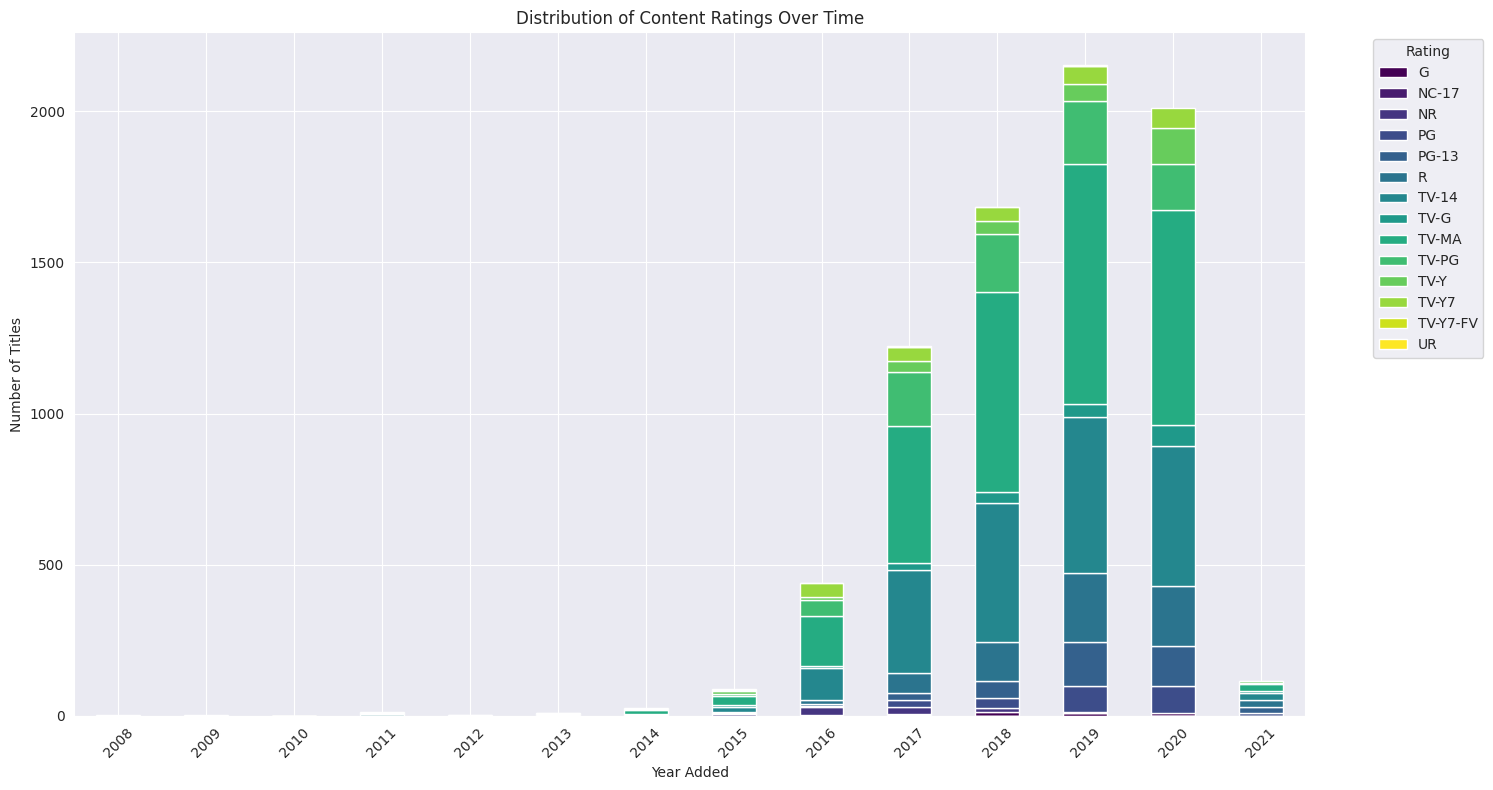

In [ ]:
ratings_over_time = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)
ratings_over_time_normalized = ratings_over_time.apply(lambda x: x / x.sum(), axis=1)

plt.figure(figsize=(15, 8))
ratings_over_time.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('Distribution of Content Ratings Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Content Age vs. Type

### Subtask:
Investigate the relationship between 'age_on_netflix' (the difference between 'year_added' and 'release_year') and the content 'type' (Movie or TV Show).


In [ ]:
movies_content_age = content_age[content_age['type'] == 'Movie']
tv_shows_content_age = content_age[content_age['type'] == 'TV Show']

**Reasoning**:
Now that the data is separated by content type, I will create two box plots to visualize the distribution of 'age_on_netflix' for movies and TV shows, respectively. This will allow for a clear comparison of content age between the two types.



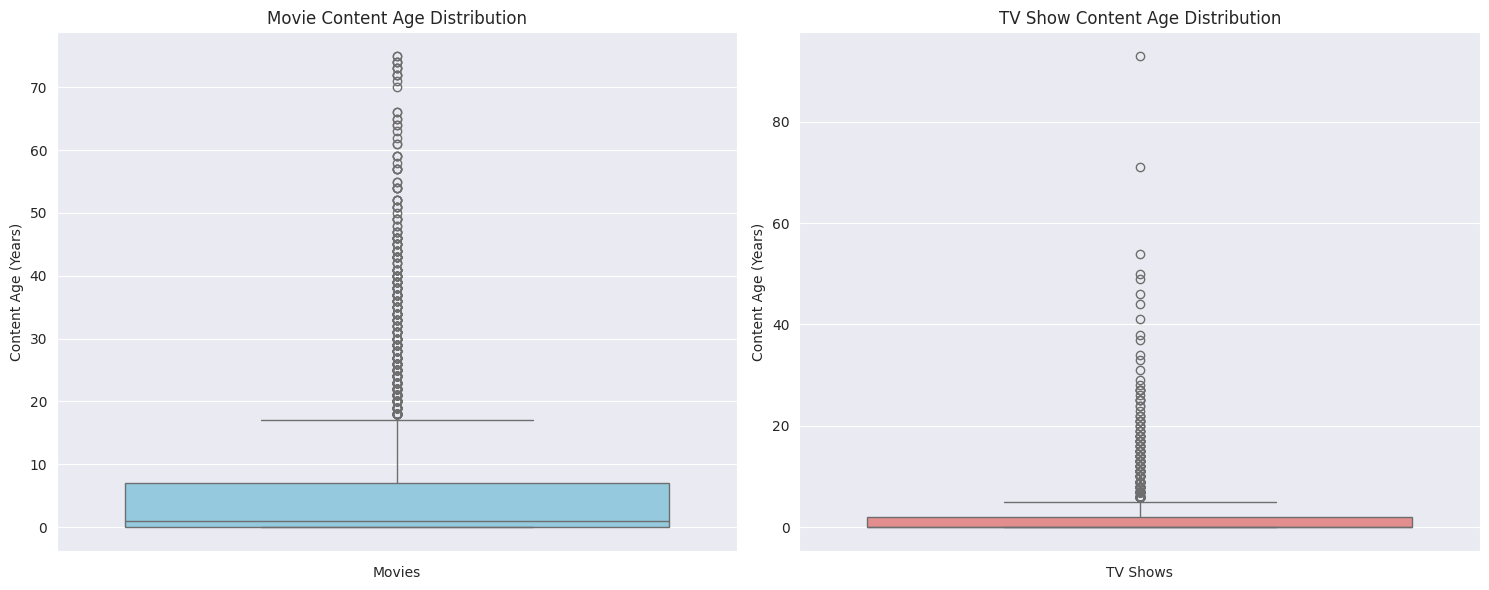

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(ax=axes[0], y='age_on_netflix', data=movies_content_age, color='skyblue').set_title('Movie Content Age Distribution')
axes[0].set_xlabel('Movies')
axes[0].set_ylabel('Content Age (Years)')

sns.boxplot(ax=axes[1], y='age_on_netflix', data=tv_shows_content_age, color='lightcoral').set_title('TV Show Content Age Distribution')
axes[1].set_xlabel('TV Shows')
axes[1].set_ylabel('Content Age (Years)')

plt.tight_layout()
plt.show()

Insight: The box plots reveal that while both movies and TV shows have content added in the same year they were released (age 0), the distribution of 'age_on_netflix' differs. Movies generally have a wider and higher distribution of content age, indicating that Netflix adds a significant amount of older movies to its library. TV shows, on the other hand, tend to have a narrower and lower 'age_on_netflix' distribution, suggesting a stronger focus on more recent or original TV series. This highlights distinct acquisition strategies for the two content types, with movies often serving to fill a historical library, while TV shows emphasize newer productions.

## Analyze Content Production Trends

### Subtask:
Identify trends in content production by analyzing the relationship between 'release_year' and 'year_added'.


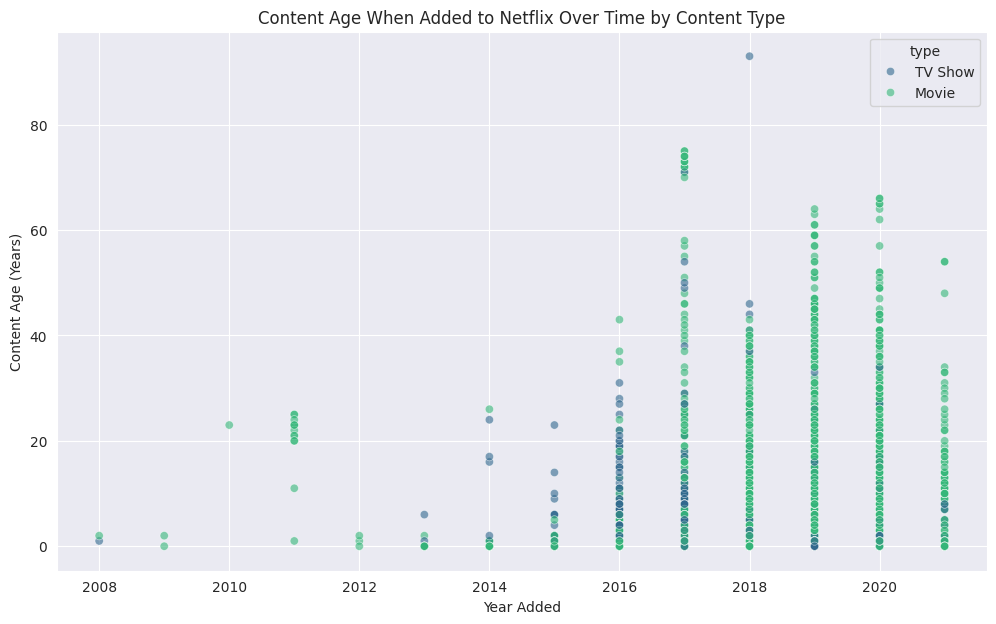

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=content_age, x='year_added', y='age_on_netflix', hue='type', palette='viridis', alpha=0.6)
plt.title('Content Age When Added to Netflix Over Time by Content Type')
plt.xlabel('Year Added')
plt.ylabel('Content Age (Years)')
plt.grid(True)
plt.show()

Insight: The scatter plot reveals distinct patterns for movies and TV shows. For both types, there's a strong concentration of content with 'age_on_netflix' close to 0, especially in more recent years, indicating a focus on adding new releases or originals. However, movies show a much broader vertical spread, meaning Netflix consistently adds older movies across many release years, maintaining a diverse back catalog. TV shows, while also having older content added, tend to have a tighter distribution, suggesting less emphasis on acquiring very old TV series compared to movies. This reinforces the idea that Netflix's acquisition strategy involves continuously adding fresh content while also enriching its movie library with a wider range of historical titles.

## Find Most Common Word Pairs in Descriptions

### Subtask:
Extract and count the most common word pairs (bigrams) from the 'description' column to uncover prevalent themes and phrases in Netflix content. This will involve text processing and visualizing the top bigrams.


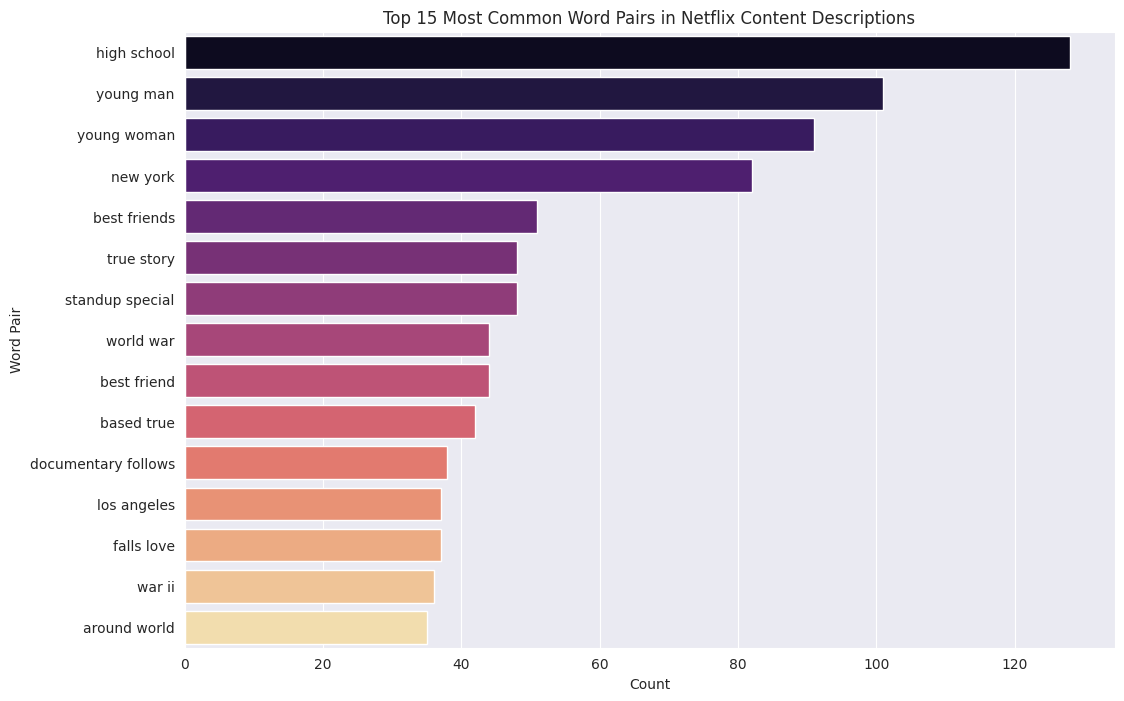

In [ ]:
import nltk
from collections import Counter
import string

# Download necessary NLTK data (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to fix LookupError: punkt_tab

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define preprocessing function
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    tokens = word_tokenize(text) # Tokenize
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1] # Remove stopwords and single characters
    return ' '.join(filtered_tokens)

# Apply preprocessing to the description column
df['processed_description'] = df['description'].apply(preprocess_text)

# Combine all processed descriptions into a single string and tokenize into words
all_words = word_tokenize(' '.join(df['processed_description']))

# Generate bigrams
bigrams = list(nltk.bigrams(all_words))

# Count bigram occurrences
bigram_counts = Counter(bigrams)

# Get the top 15 most common bigrams
top_15_bigrams = bigram_counts.most_common(15)

# Convert to DataFrame for plotting
top_15_bigrams_df = pd.DataFrame(top_15_bigrams, columns=['Bigram', 'Count'])
top_15_bigrams_df['Bigram'] = top_15_bigrams_df['Bigram'].apply(lambda x: f'{x[0]} {x[1]}')

# Plot the top 15 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Bigram', data=top_15_bigrams_df, palette='magma', hue='Bigram', legend=False)
plt.title('Top 15 Most Common Word Pairs in Netflix Content Descriptions')
plt.xlabel('Count')
plt.ylabel('Word Pair')
plt.show()

Insight: The most common word pairs, such as "high school," "young man," and "young woman," indicate a strong prevalence of coming-of-age stories, romantic dramas, and narratives focusing on youth. Other prominent pairs like "new york," "best friends," "true story," and "world war" suggest themes involving specific locations, deep personal relationships, factual historical events, and conflict, aligning with common genres on Netflix like documentaries, dramas, and biographical films.

## Identify Top Directors

### Subtask:
Determine the most prolific directors on Netflix by parsing the 'director' column (handling multiple directors per title) and counting their contributions. We will then visualize the top directors and their content count.


**Reasoning**:
First, I will parse the 'director' column by splitting entries with multiple directors and exploding them into separate rows. This ensures each director's contribution is counted individually. I will also filter out entries where the director is marked as 'Unknown' as these are placeholders for missing data, not actual directors.



In [ ]:
directors_df = df.assign(director=df['director'].str.split(', ')).explode('director')
directors_df = directors_df[directors_df['director'] != 'Unknown']

top_directors = directors_df['director'].value_counts().head(10).reset_index()
top_directors.columns = ['Director', 'Count']

**Reasoning**:
Now that the top 10 directors and their content counts have been extracted, I will create a bar plot to visualize this distribution, making it easy to identify the most prolific directors on Netflix.



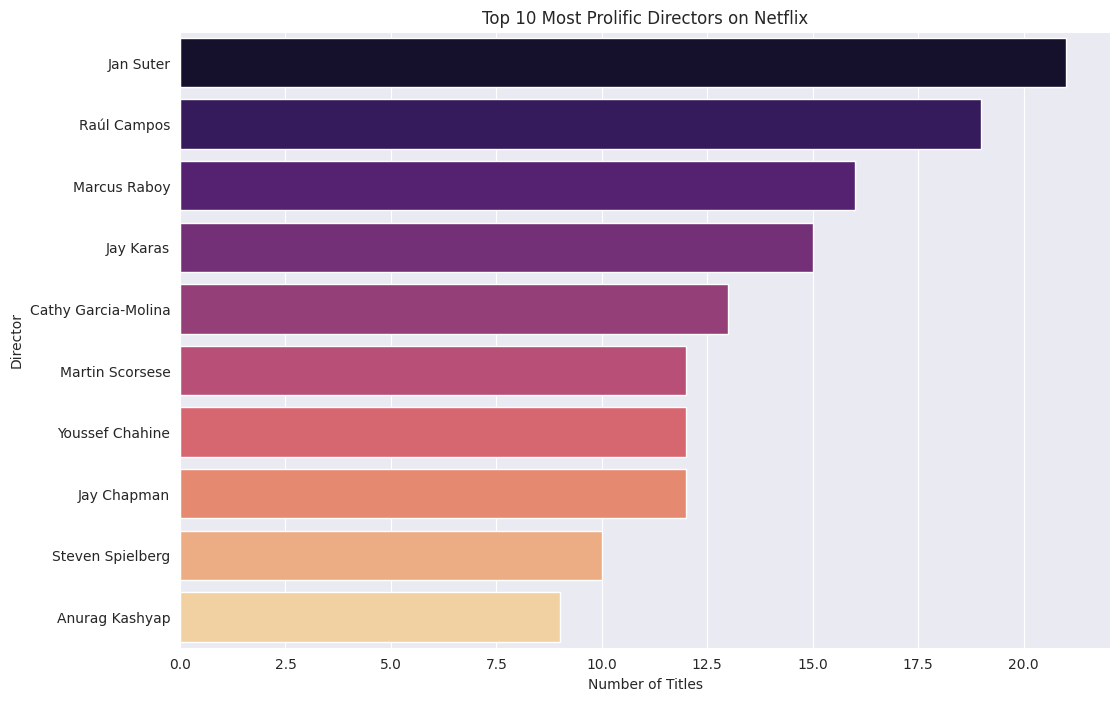

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Director', data=top_directors, palette='magma', hue='Director', legend=False)
plt.title('Top 10 Most Prolific Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

## Final Task

### Subtask:
Summarize the findings and insights from the analysis of content ratings over time, content age vs. type, production trends, common word pairs, and top directors.


## Summary:

### Data Analysis Key Findings

*   **Content Ratings Over Time:** The distribution of content ratings has evolved, with specific ratings gaining or losing prominence over the years, indicating shifts in content strategy or audience demographics.
*   **Content Age vs. Type:** Netflix's acquisition strategy differs significantly between movies and TV shows. Movies generally have a wider and higher distribution of 'age\_on\_netflix', meaning a substantial amount of older movies are added to the library to fill a historical catalog. TV shows, conversely, exhibit a narrower and lower 'age\_on\_netflix' distribution, emphasizing newer or original productions.
*   **Content Production Trends:** For both movies and TV shows, there is a strong focus on adding new releases (content with 'age\_on\_netflix' close to 0), particularly in recent years. While movies show a broader vertical spread in terms of age when added, consistently incorporating older titles, TV shows have a tighter distribution, indicating less emphasis on acquiring very old series.
*   **Common Word Pairs in Descriptions:** Analysis of bigrams reveals prevalent themes such as "high school," "young man," and "young woman," suggesting a strong focus on coming-of-age stories, romantic dramas, and youth-centric narratives. Other common pairs like "new york," "best friends," "true story," and "world war" point to genres involving specific locations, personal relationships, factual historical events, and conflict.
*   **Top Directors:** The analysis identified the most prolific directors on Netflix, indicating key creative contributors to the platform's content library.

### Insights or Next Steps

*   Netflix employs distinct content acquisition strategies for movies and TV shows, prioritizing a diverse historical back catalog for movies while focusing on newer and original productions for TV shows. This dual strategy helps cater to different audience preferences and maintain a fresh, engaging library.
*   The prevalence of youth-oriented and historical/factual themes in content descriptions suggests target audience segments and popular content genres on the platform. Further analysis could investigate the correlation between these themes and viewer engagement or subscriber growth.
